In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from desilike.samples import Chain
from desilike import setup_logging

setup_logging()
chain = Chain.load('test_QSO_z1.45.npy').remove_burnin(0.3)
z = 1.45

[000000.00] [0/1] 03-15 17:59  Chain                     INFO     Loading test_QSO_z1.45.npy.


In [6]:
from desilike.samples import plotting
%matplotlib inline

Removed no burn in
[000089.86] [0/1] 03-15 18:00  root                      WARNING  auto bandwidth for df very small or failed (h=0.0006835386046207697,N_eff=258300.0). Using fallback (h=0.005346429347166454)
[000090.27] [0/1] 03-15 18:00  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0006984594129515434,N_eff=258300.0). Using fallback (h=0.003210412171879162)
[000090.83] [0/1] 03-15 18:00  root                      WARNING  auto bandwidth for alpha4 very small or failed (h=0.0006319545443473757,N_eff=258300.0). Using fallback (h=0.0032305276547299412)
[000090.91] [0/1] 03-15 18:00  root                      WARNING  auto bandwidth for sn0 very small or failed (h=0.000827022117154519,N_eff=258300.0). Using fallback (h=0.005888191323434091)
[000090.98] [0/1] 03-15 18:00  root                      WARNING  auto bandwidth for sn2 very small or failed (h=0.0007104780248609773,N_eff=258300.0). Using fallback (h=0.004039163891336107)
[000091.07] [0/1] 03

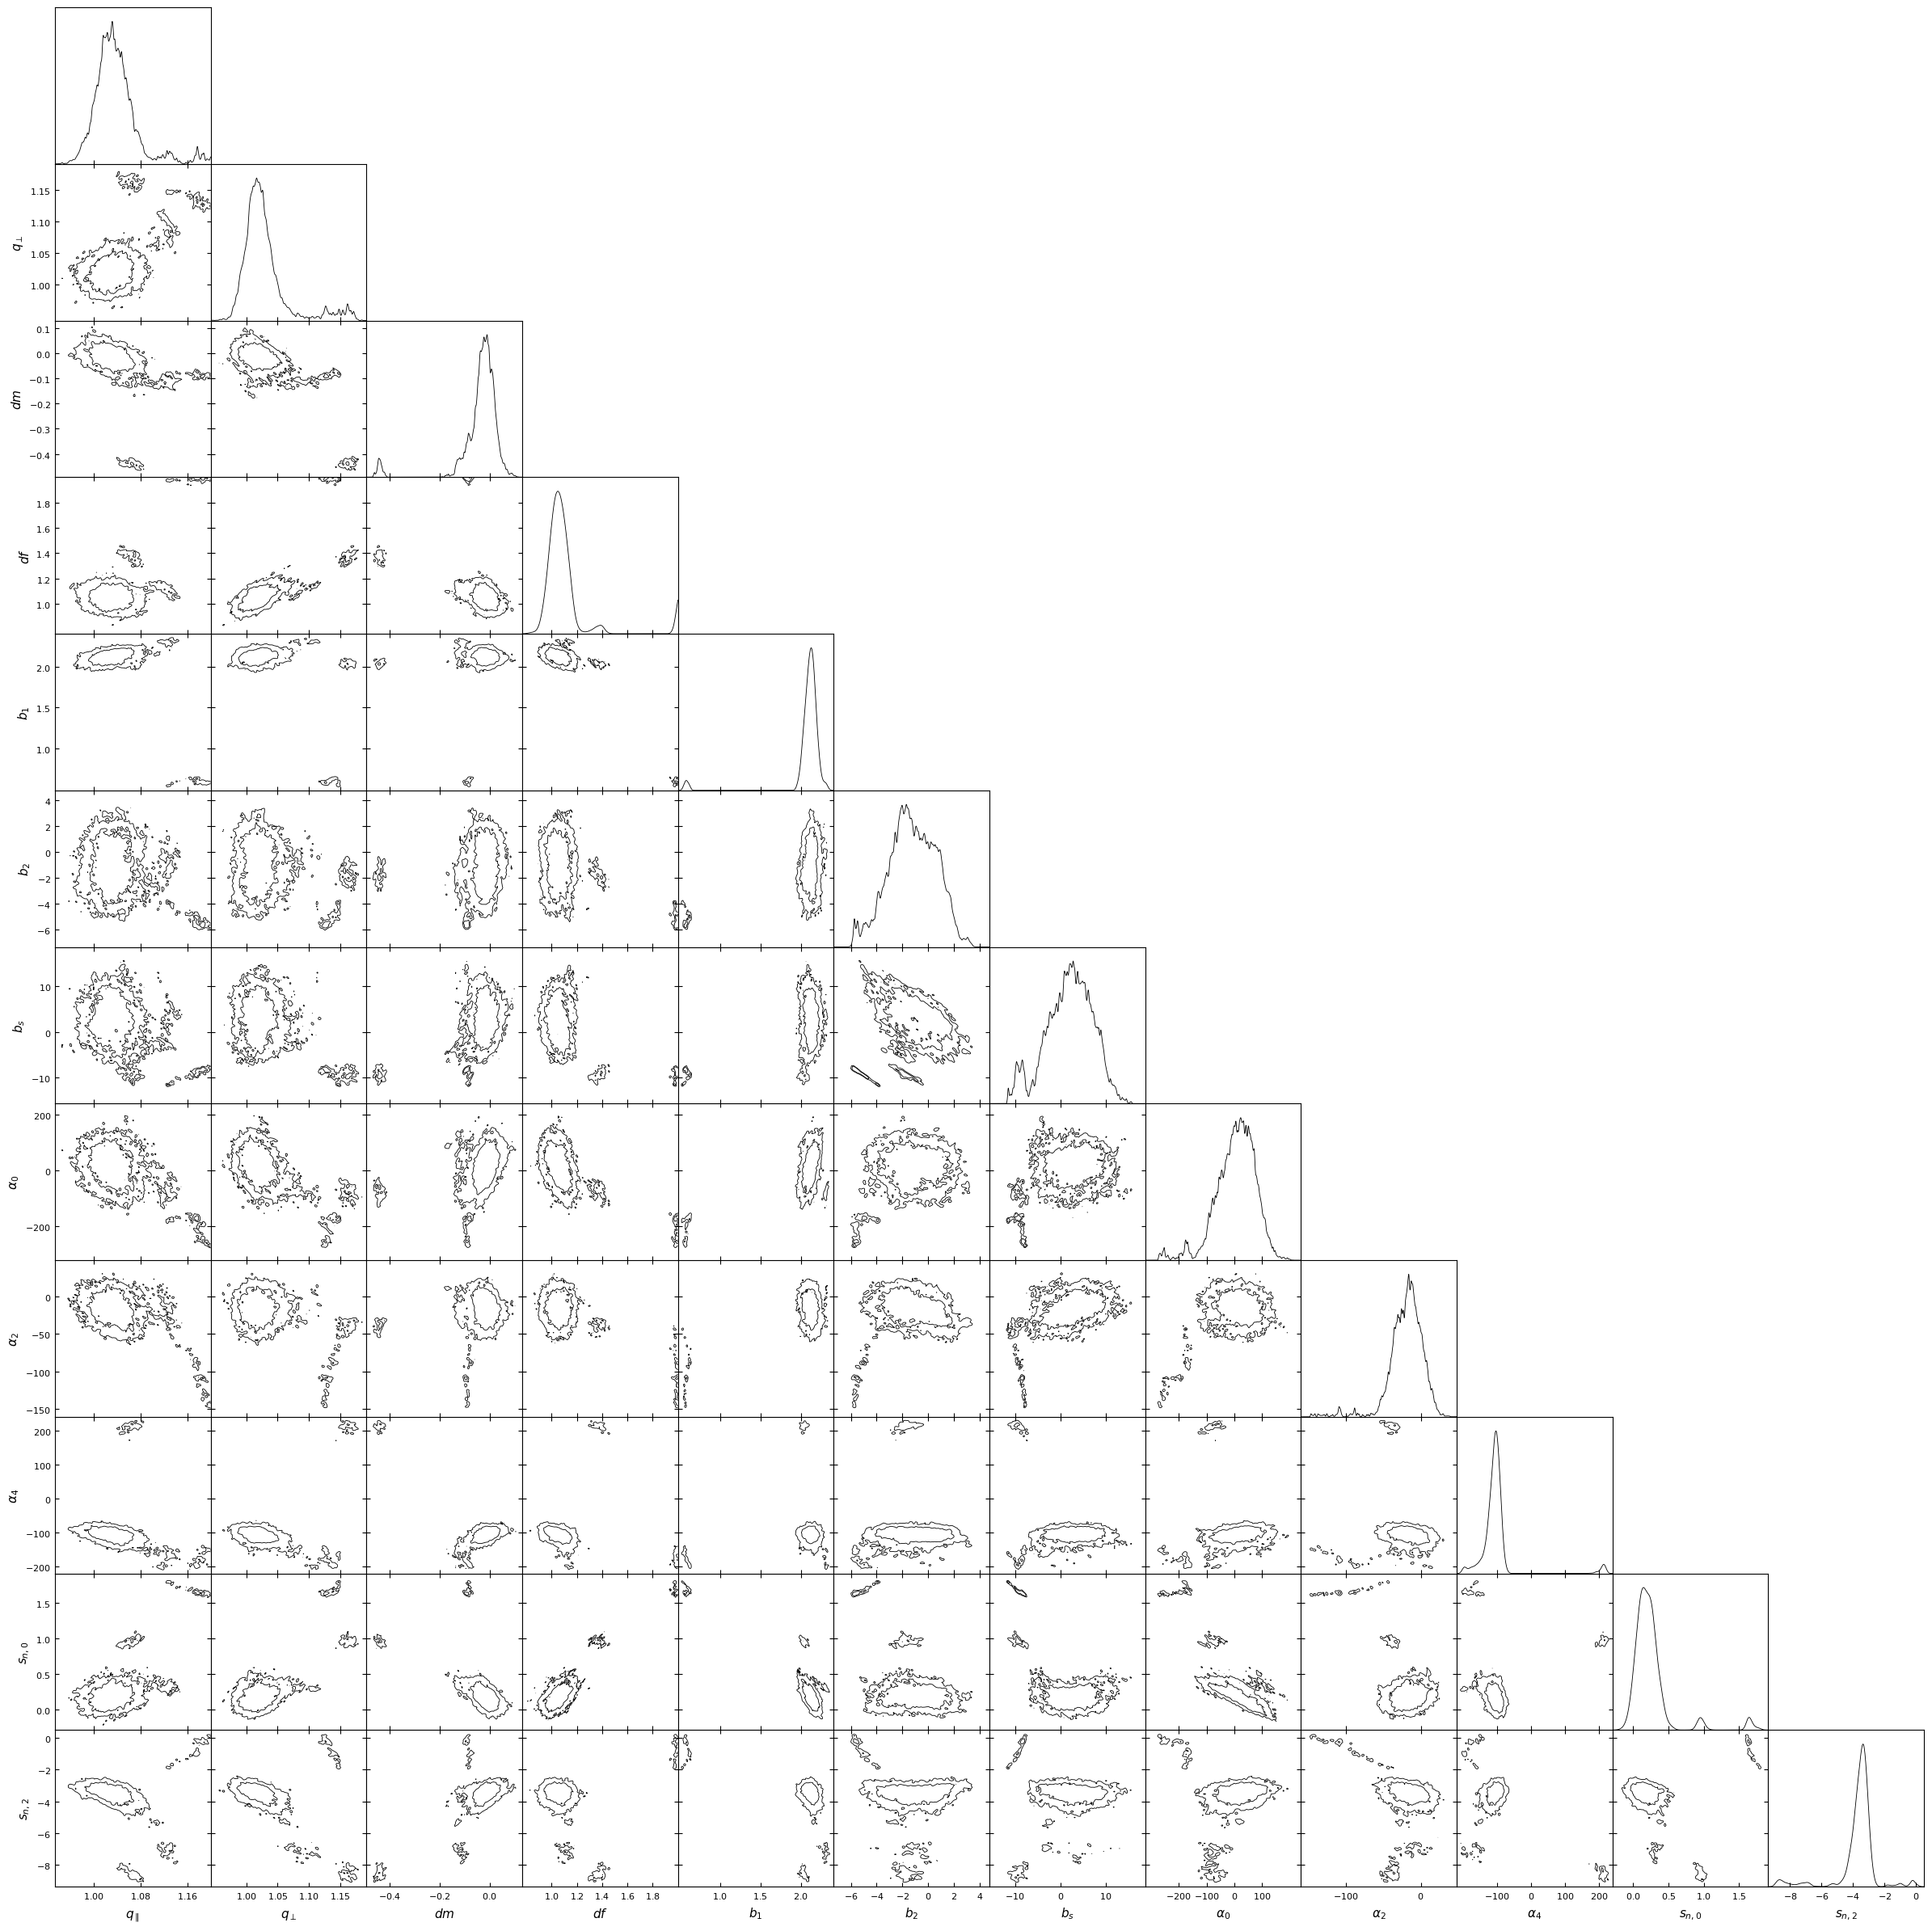

[000138.93] [0/1] 03-15 18:01  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000138.93] [0/1] 03-15 18:01  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral


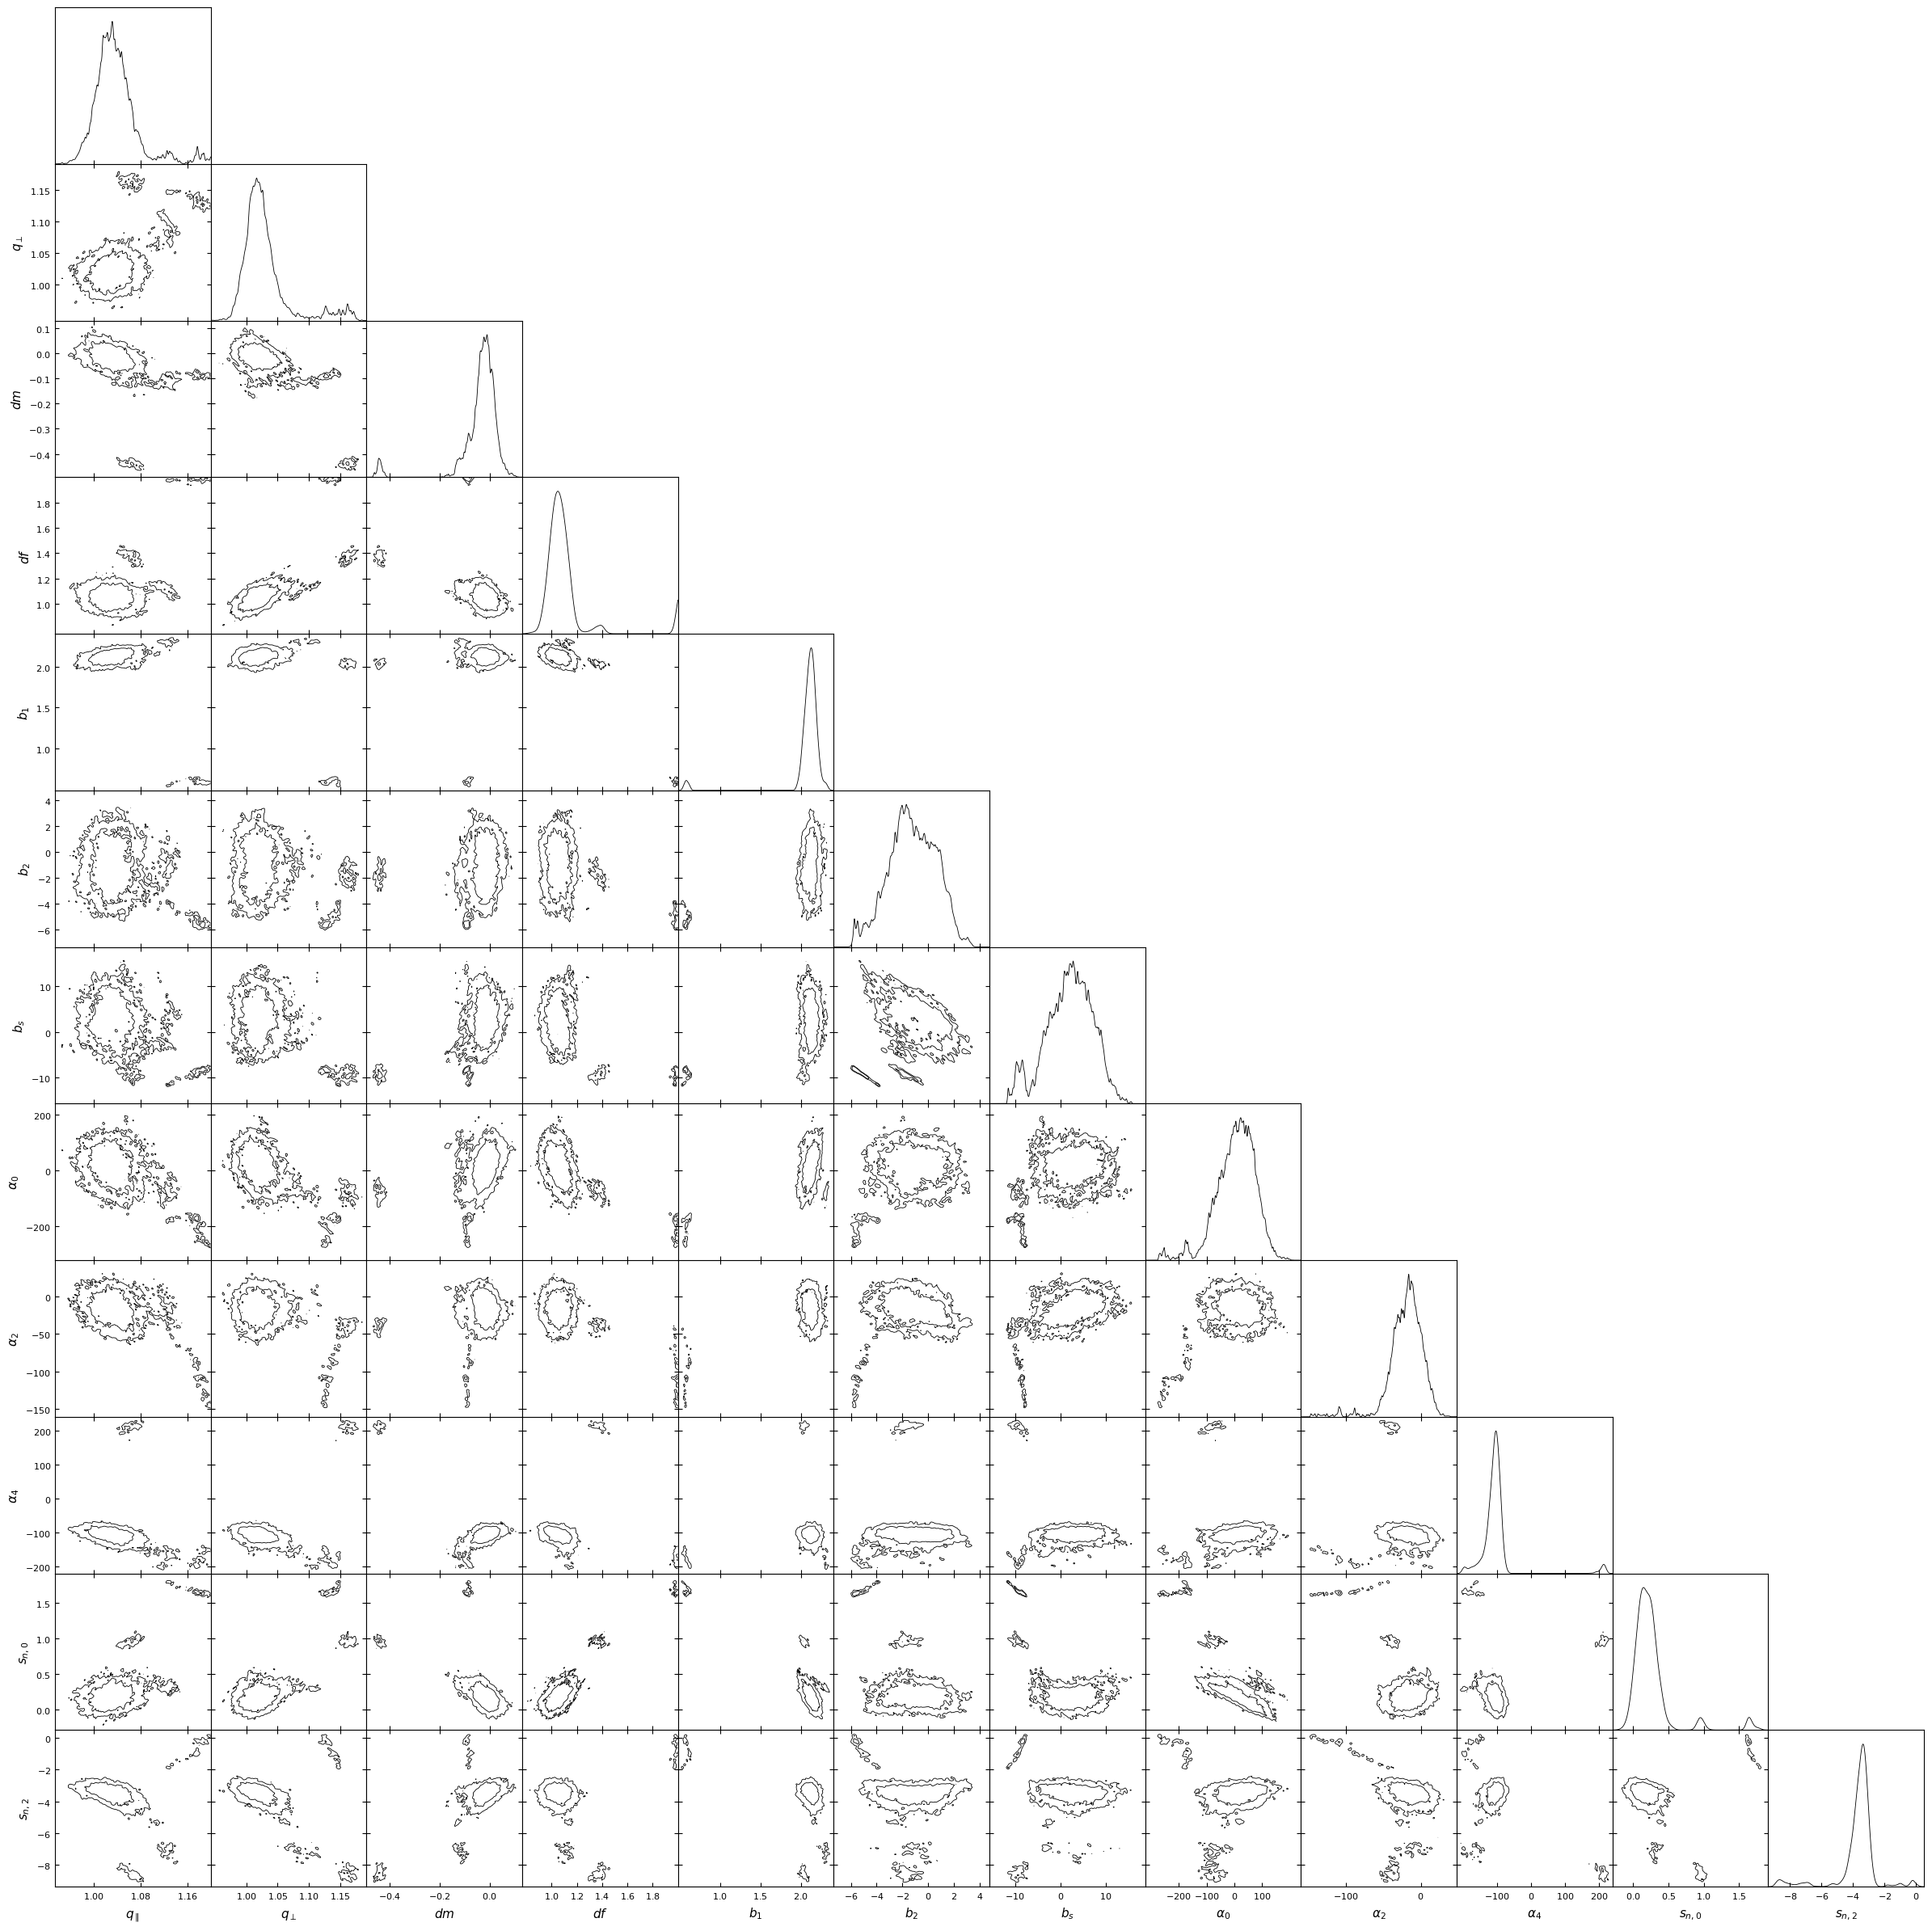

In [7]:
plotting.plot_triangle(chain);

In [5]:
print(chain.to_stats(tablefmt='pretty'))

+--------+--------+--------+--------+-------+-----------------+-----------------+
|        | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+--------+--------+--------+--------+-------+-----------------+-----------------+
|  qpar  | 1.019  | 1.039  | 1.033  | 0.039 |  -0.031/+0.025  |  -0.036/+0.020  |
|  qper  | 1.010  | 1.030  | 1.021  | 0.038 |  -0.028/+0.019  |  -0.033/+0.010  |
|   dm   | 0.016  | -0.039 | -0.023 | 0.085 |  -0.036/+0.053  |  -0.019/+0.062  |
|   df   |  1.02  |  1.10  |  1.06  | 0.19  |  -0.107/+0.046  |  -0.118/+0.032  |
|   b1   |  2.12  |  2.07  |  2.12  | 0.28  |  -0.029/+0.115  |  -0.024/+0.119  |
|   b2   |  0.2   |  -1.2  |  -1.3  |  1.8  |    -1.8/+2.0    |    -1.6/+2.2    |
|   bs   |  4.1   |  1.9   |  2.3   |  5.1  |    -5.1/+5.2    |    -4.6/+5.6    |
| alpha0 |   48   |   5    |   12   |  71   |     -64/+66     |     -54/+75     |
| alpha2 |  -21   |  -19   |  -17   |  23   |    -17/+20.     |    -17/+20.     |
| alpha4 |  -97 

In [8]:
path_pk = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/pk_HN/FOLPS_QSO_theory_z1.45_kmax0.32_ell024.txt'

pk_file = np.loadtxt(path_pk)
print(pk_file.shape)

path_cov = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/covariances/cov_gaussian_prerec_QSO_GCcomb_0.8_2.1_ell024.txt'

file2 = path_cov
covariance_data = np.loadtxt(file2)
print(covariance_data.shape)

(64, 4)
(192, 192)


In [9]:
pk_subfile1 = pk_file[:,1:2]
pk_subfile2 = pk_file[:,2:3]
pk_subfile3 = pk_file[:,3:4]

pk_1 = np.vstack((pk_subfile1,pk_subfile2))
pk = np.vstack((pk_1,pk_subfile3))
pk.shape

(192, 1)

In [16]:
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, ShapeFitPowerSpectrumTemplate, LPTVelocileptorsTracerPowerSpectrumMultipoles

template = ShapeFitPowerSpectrumTemplate(z=1.45)
theory = LPTVelocileptorsTracerPowerSpectrumMultipoles(template = template)

In [17]:
print(theory.varied_params)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


ParameterCollection(['qpar', 'qper', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p'])


In [18]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
             data=pk,
             covariance=covariance_data,
             klim={0: [0.00379811, 0.3175159, 0.0049], 2: [0.00379811, 0.3175159, 0.0049], 4:[0.00379811, 0.3175159, 0.0049]},  
             theory=theory)

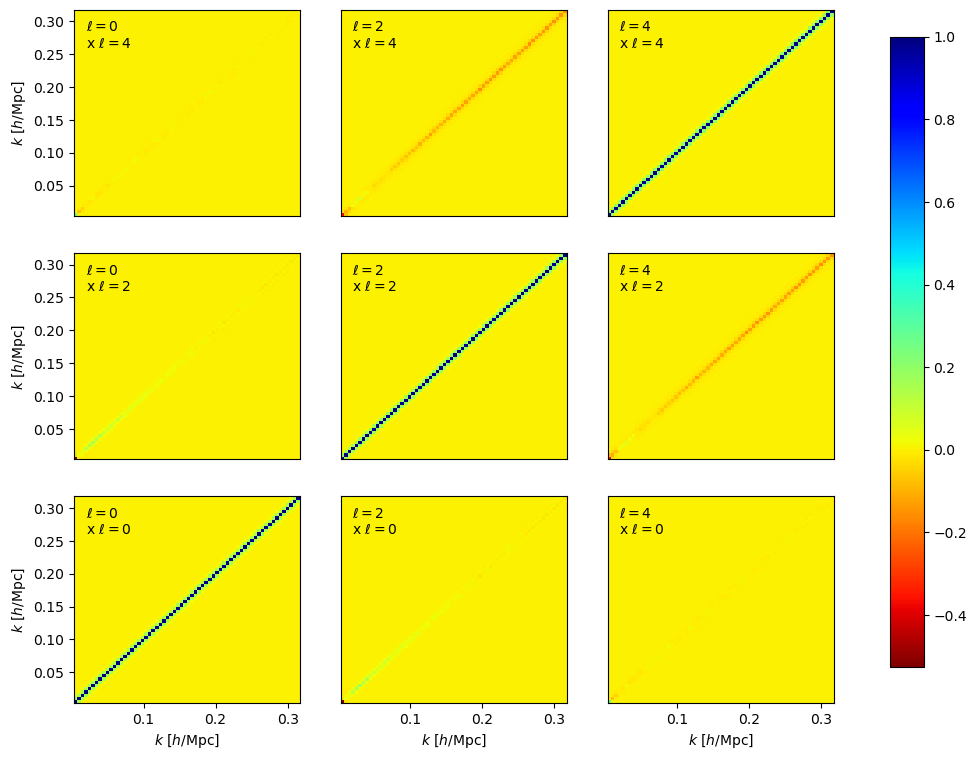

In [19]:
observable.plot_covariance_matrix();

In [15]:
from desilike.theories import Cosmoprimo

cosmo = Cosmoprimo()

cosmo.params = {'h': {'prior': {'limits': [0.5, 0.9]}},
                     'omega_b': {'prior': {'limits': [0.022, 0.02274]}},
                     'logA' : {'prior' : {'limits': [2,4]}},
                     'omega_cdm': {'prior': {'limits': [0.05,0.2]}}            
                     }

In [20]:
from desilike.likelihoods import ObservablesGaussianLikelihood

likelihood = ObservablesGaussianLikelihood(observables = [observable])

In [21]:
likelihood()

Array(-3955.04722444, dtype=float64)

In [22]:
from desilike.emulators import Emulator, EmulatedCalculator, MLPEmulatorEngine, TaylorEmulatorEngine

#emulator = Emulator(theory, engine=MLPEmulatorEngine)
#emulator.set_samples()
#emulator.fit()
#emulator.plot(name='power')

[000381.25] [0/1] 03-15 18:05  Emulator                  INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p'].
[000381.25] [0/1] 03-15 18:05  Emulator                  INFO     Found varying ['f_sqrt_Ap', 'm', 'power', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'alpha6', 'sn0', 'sn2', 'sn4'] and fixed ['n', 'k', 'z', 'ells', 'nd', 'b3'] outputs.
[000391.72] [0/1] 03-15 18:05  Differentiation           INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p'].
[000443.34] [0/1] 03-15 18:06  Differentiation           INFO     Using finite-differentiation for parameter qpar.
[000453.16] [0/1] 03-15 18:06  Differentiation           INFO     Using finite-differentiation for parameter qper.
[000462.97] [0/1] 03-15 18:06  Differentiation           INFO     Using finite-differentiation for parameter dm.
[000472.54] [0/1] 03-15 18:06

[<Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>,
 <Figure size 600x600 with 2 Axes>]

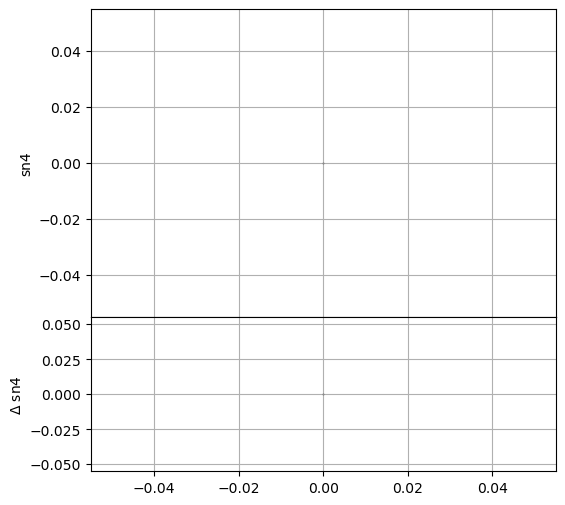

In [23]:
emulator = Emulator(theory, engine=TaylorEmulatorEngine(order = 2))
emulator.set_samples()
emulator.fit()
emulator.plot(name='power')

In [24]:
from desilike.samplers import EmceeSampler

observable.init.update(theory=emulator.to_calculator())

sampler = EmceeSampler(likelihood,save_fn = 'test_QSO_z1_45_lptvelocileptors.npy', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[000878.54] [0/1] 03-15 18:13  EmceeSampler              INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p'].
[000879.58] [0/1] 03-15 18:13  EmceeSampler              INFO     Successfully vmap input likelihood.
[000879.84] [0/1] 03-15 18:13  EmceeSampler              INFO     Successfully jit input likelihood.
[000880.70] [0/1] 03-15 18:13  TaskManager               INFO     Entering TaskManager with 1 workers.
[000891.49] [0/1] 03-15 18:13  Chain                     INFO     Saving test_QSO_z1_45_lptvelocileptors.npy.
[000891.50] [0/1] 03-15 18:13  EmceeSampler              INFO     Diagnostics:
[000891.55] [0/1] 03-15 18:13  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 29.7; not < 0.15.
[000891.59] [0/1] 03-15 18:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 1.58.
[000891.84] [0/1] 03-15 18:13  Diagnostics               INFO     - max diag Gelman-Rubin - 1

[Chain(shape=(57600, 32), params=ParameterCollection(['qpar', 'qper', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p', 'logposterior', 'dn', 'b3p', 'alpha6p', 'f_sqrt_Ap', 'm', 'n', 'b1', 'b2', 'bs', 'b3', 'alpha0', 'alpha2', 'alpha4', 'alpha6', 'sn0', 'sn2', 'sn4', 'loglikelihood', 'logprior']))]

In [25]:
chain2 = sampler.chains[0].remove_burnin(0.3)
print(chain2.to_stats(tablefmt='pretty'))

+---------+--------+--------+--------+-------+-----------------+-----------------+
|         | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+---------+--------+--------+--------+-------+-----------------+-----------------+
|  qpar   | 1.000  | 1.006  | 1.005  | 0.023 |  -0.023/+0.023  |  -0.025/+0.022  |
|  qper   | 1.032  | 1.026  | 1.027  | 0.018 |  -0.019/+0.018  |  -0.019/+0.018  |
|   dm    | 0.003  | -0.008 | -0.008 | 0.028 |  -0.028/+0.027  |  -0.026/+0.028  |
|   df    | 1.096  | 1.087  | 1.086  | 0.061 |  -0.061/+0.062  |  -0.063/+0.059  |
|   b1p   | 0.858  | 0.847  | 0.850  | 0.027 |  -0.028/+0.026  |  -0.023/+0.030  |
|   b2p   | -0.48  | -0.49  | -0.50  | 0.22  |   -0.22/+0.22   |   -0.24/+0.20   |
|   bsp   |  0.53  |  0.61  |  0.62  | 0.28  |   -0.31/+0.30   |   -0.29/+0.31   |
| alpha0p |  1.6   |  0.6   |  0.7   |  4.3  |    -4.2/+4.3    |    -4.1/+4.3    |
| alpha2p |  -0.9  |  -1.9  |  -1.8  |  4.7  |    -4.7/+4.7    |    -4.1/+5.1    |
| al

Removed no burn in
[003429.89] [0/1] 03-15 18:56  root                      WARNING  auto bandwidth for qpar very small or failed (h=0.0003215683885951309,N_eff=1290240.0). Using fallback (h=0.008318865802851412)
[003430.30] [0/1] 03-15 18:56  root                      WARNING  auto bandwidth for qper very small or failed (h=0.00029317334488261973,N_eff=1290240.0). Using fallback (h=0.007581776992514245)
[003430.70] [0/1] 03-15 18:56  root                      WARNING  auto bandwidth for dm very small or failed (h=0.0003108590325311441,N_eff=1290240.0). Using fallback (h=0.00772667183668877)
[003431.08] [0/1] 03-15 18:56  root                      WARNING  auto bandwidth for df very small or failed (h=0.0003258101697997981,N_eff=1290240.0). Using fallback (h=0.006665869316004445)
[003431.46] [0/1] 03-15 18:56  root                      WARNING  auto bandwidth for b1p very small or failed (h=0.0003150057461796428,N_eff=1290240.0). Using fallback (h=0.0072104371057704775)
[003432.17] [0/

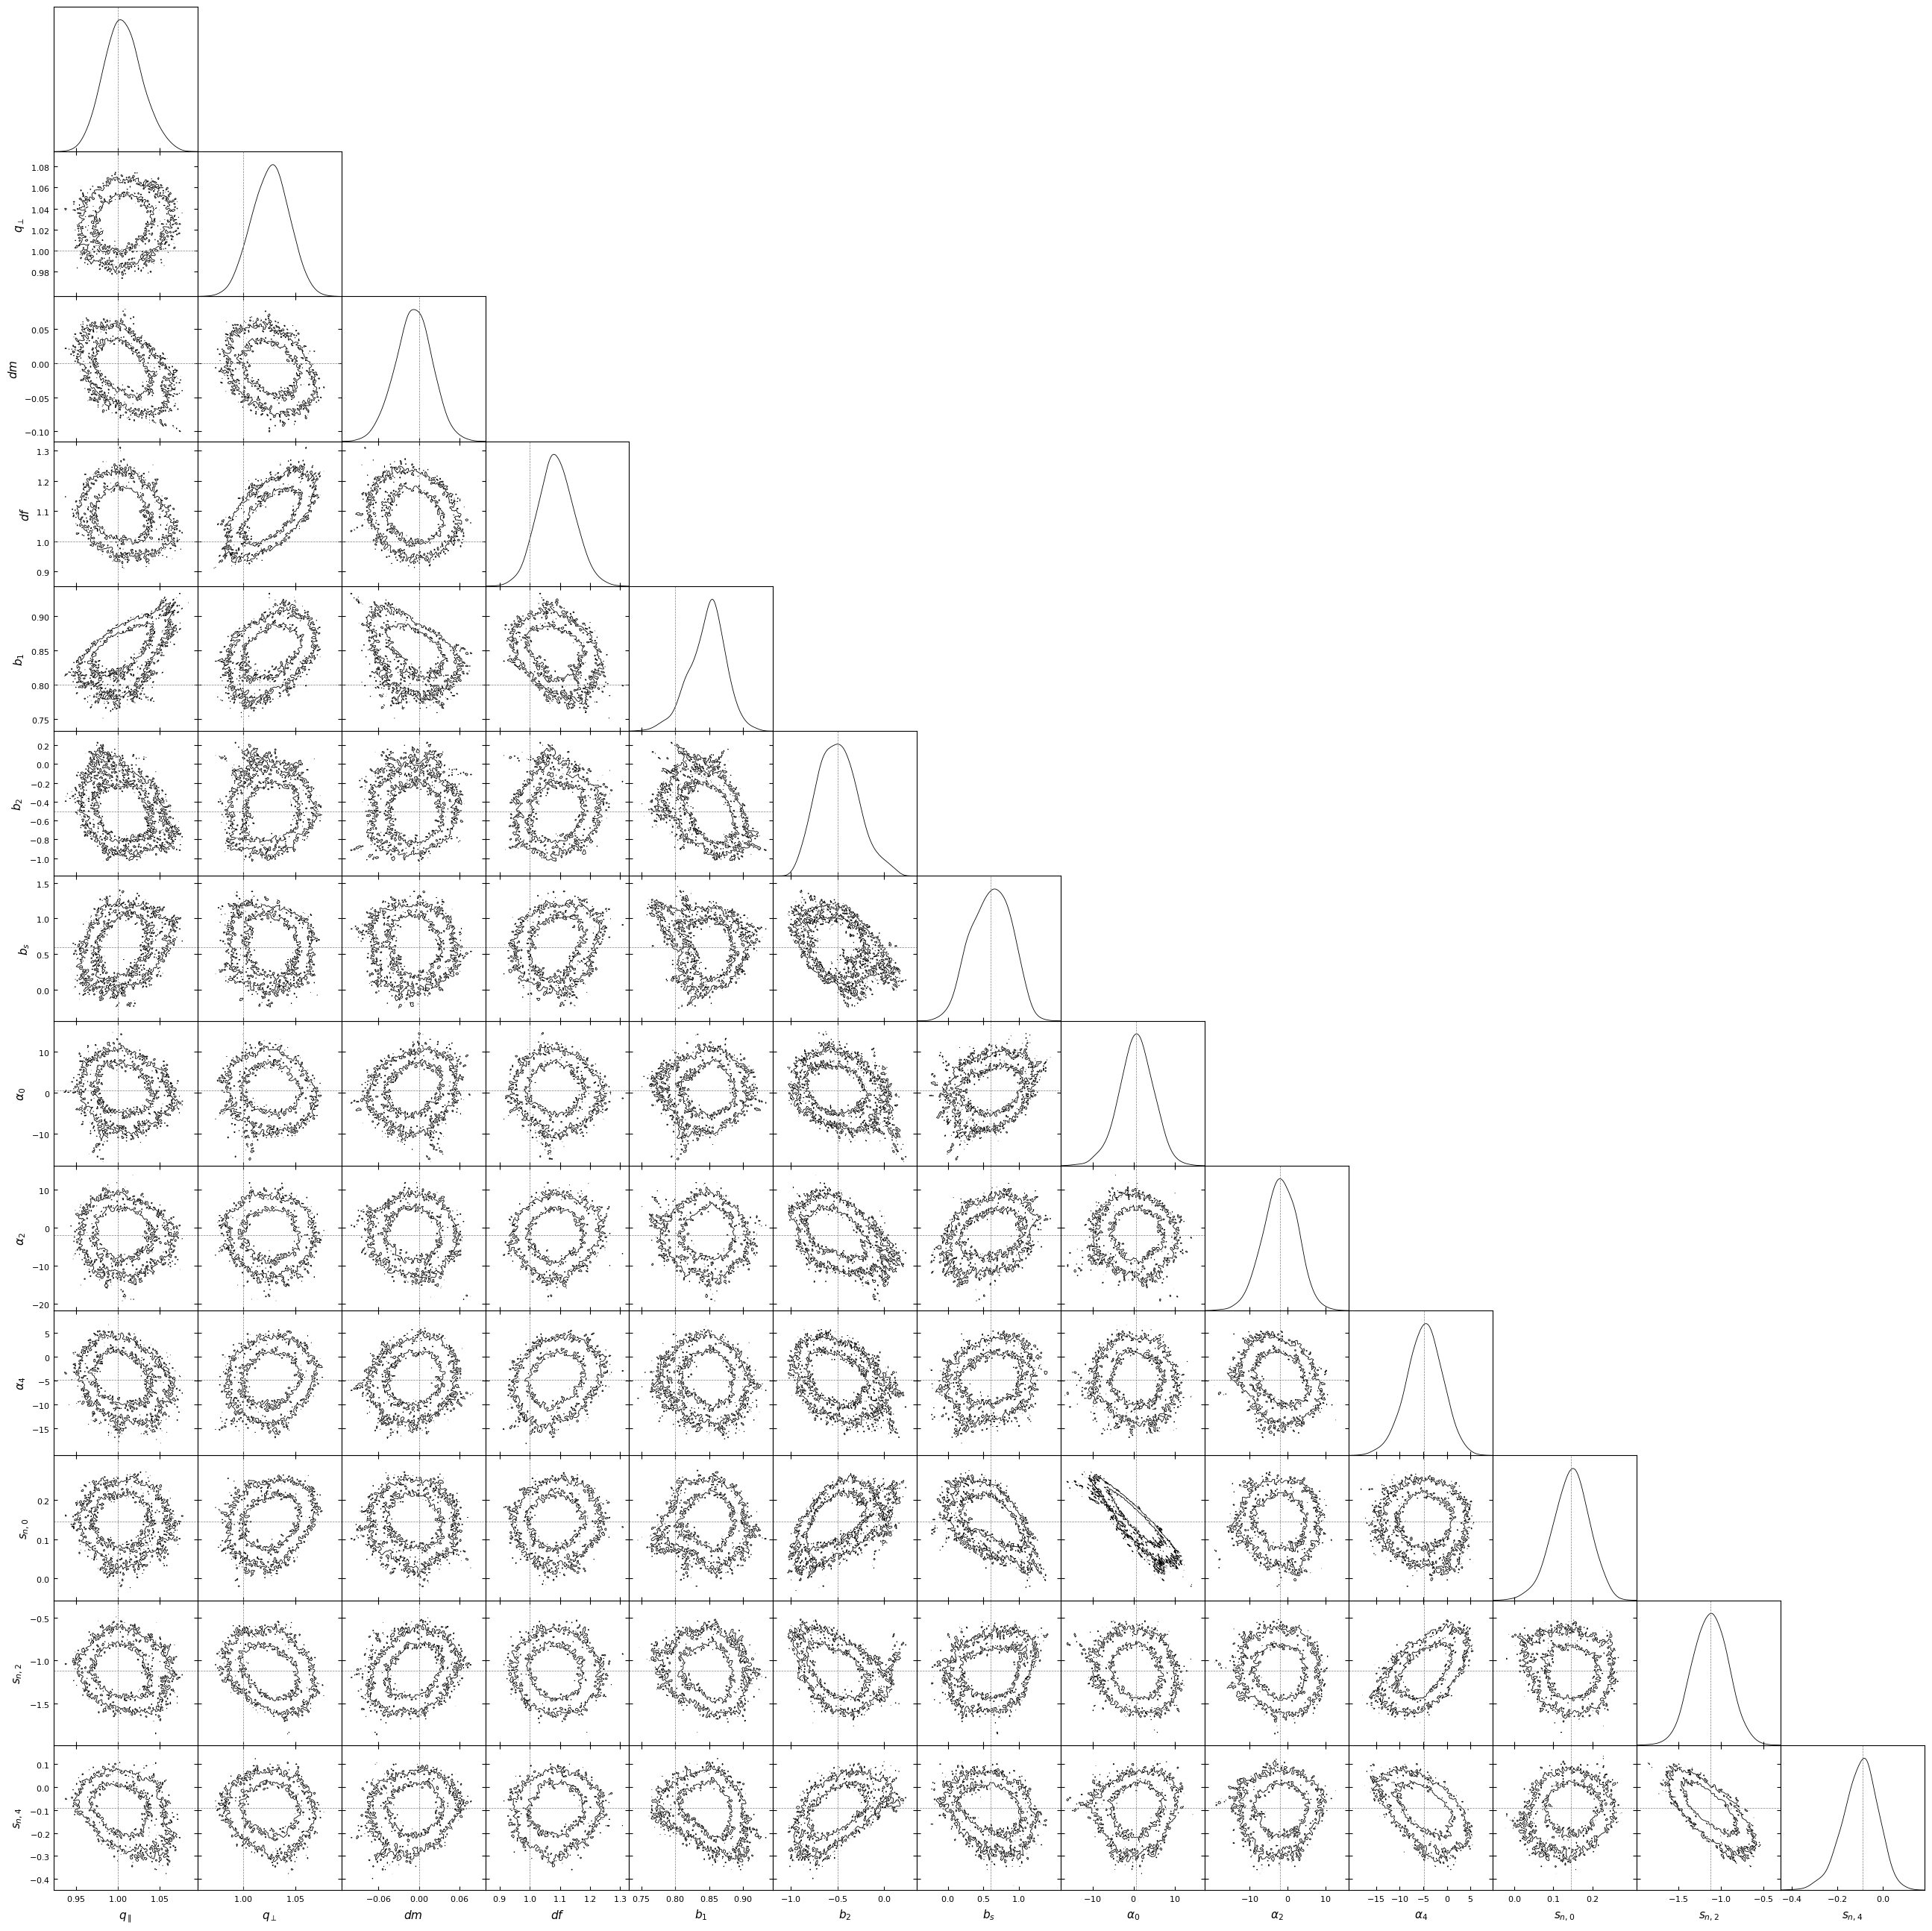

In [26]:
plotting.plot_triangle(chain2, labels = ['LPTVelocileptors'], markers = {'qpar':1,'qper':1,'dm':0,'df':1,'b1p':0.8,'b2p':-.5,'bsp':0.6,'alpha0p':0.6,'alpha2p':-1.9,'alpha4p':-4.8,'sn0p':0.145,'sn2p':-1.12,'sn4p':-0.09});
plt.savefig('test_QSO_z1_45_v1_lptvelocileptors')

In [31]:
theory2 = KaiserTracerPowerSpectrumMultipoles(template = template)

In [32]:
observable2 = TracerPowerSpectrumMultipolesObservable(
             data=pk,
             covariance=covariance_data,
             klim={0: [0.00379811, 0.3175159, 0.0049], 2: [0.00379811, 0.3175159, 0.0049], 4:[0.00379811, 0.3175159, 0.0049]},  
             theory=theory2)

In [33]:
likelihood2 = ObservablesGaussianLikelihood(observables = [observable2])
likelihood2()

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


Array(-11650.11065773, dtype=float64)

In [34]:
emulator = Emulator(theory2, engine=TaylorEmulatorEngine(order=2))  # order 2 except for sn0 (order 1 is enough)
emulator.set_samples()
emulator.fit()
#emulator.plot(name='power')

[004037.48] [0/1] 03-15 19:06  Emulator                  INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[004037.48] [0/1] 03-15 19:06  Emulator                  INFO     Found varying ['f_sqrt_Ap', 'm', 'power'] and fixed ['n', 'k', 'z', 'ells', 'nd'] outputs.
[004037.48] [0/1] 03-15 19:06  Differentiation           INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[004038.24] [0/1] 03-15 19:06  Differentiation           INFO     Using auto-differentiation for parameter qpar.
[004038.33] [0/1] 03-15 19:06  Differentiation           INFO     Using auto-differentiation for parameter qper.
[004038.66] [0/1] 03-15 19:06  Differentiation           INFO     Using auto-differentiation for parameter dm.
[004038.73] [0/1] 03-15 19:06  Differentiation           INFO     Using auto-differentiation for parameter df.
[004038.78] [0/1] 03-15 19:06  Differentiation           INFO     Using auto-differentiation for parameter b1.
[004038.84] [0/1] 03-15 19:0

In [36]:
observable.init.update(theory=emulator.to_calculator())

sampler = EmceeSampler(likelihood, save_fn = 'test_QSO_z1_45_kaiser_2', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[004092.99] [0/1] 03-15 19:07  EmceeSampler              INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[004093.14] [0/1] 03-15 19:07  EmceeSampler              INFO     Successfully vmap input likelihood.
[004093.27] [0/1] 03-15 19:07  EmceeSampler              INFO     Successfully jit input likelihood.
[004093.45] [0/1] 03-15 19:07  TaskManager               INFO     Entering TaskManager with 1 workers.
[004096.75] [0/1] 03-15 19:07  Chain                     INFO     Saving test_QSO_z1_45_kaiser_2.
[004096.76] [0/1] 03-15 19:07  EmceeSampler              INFO     Diagnostics:
[004096.78] [0/1] 03-15 19:07  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 13.8; not < 0.15.
[004096.80] [0/1] 03-15 19:07  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 4.39.
[004096.94] [0/1] 03-15 19:07  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 6.61.
[004096.95] [0/1] 03-15 19:07  Diagnostics           

[Chain(shape=(3000, 16), params=ParameterCollection(['qpar', 'qper', 'dm', 'df', 'b1', 'sn0', 'logposterior', 'dn', 'sigmapar', 'sigmaper', 'f_sqrt_Ap', 'm', 'n', 'loglikelihood', 'logprior']))]

In [38]:
chain4 = sampler.chains[0].remove_burnin(0.3)
print(chain4.to_stats(tablefmt='pretty'))

+------+--------+--------+--------+--------+-----------------+-----------------+
|      | argmax |  mean  | median |  std   | quantile:1sigma | interval:1sigma |
+------+--------+--------+--------+--------+-----------------+-----------------+
| qpar | 0.853  | 0.853  | 0.853  | 0.010  |  -0.010/+0.010  | -0.0109/+0.0092 |
| qper | 1.173  | 1.175  | 1.175  | 0.011  |  -0.010/+0.011  |  -0.010/+0.011  |
|  dm  | 0.074  | 0.078  | 0.078  | 0.019  |  -0.019/+0.019  |  -0.019/+0.019  |
|  df  | 0.795  | 0.798  | 0.797  | 0.038  |  -0.039/+0.039  |  -0.040/+0.038  |
|  b1  | 2.265  | 2.261  | 2.261  | 0.026  |  -0.026/+0.026  |  -0.025/+0.027  |
| sn0  | 0.0522 | 0.0518 | 0.0518 | 0.0035 | -0.0035/+0.0035 | -0.0036/+0.0034 |
+------+--------+--------+--------+--------+-----------------+-----------------+


In [27]:
chain3 = Chain.load('test_QSO_z1_45_kaiser.npy').remove_burnin(0.3)

[003581.32] [0/1] 03-15 18:58  Chain                     INFO     Loading test_QSO_z1_45_kaiser.npy.


Removed no burn in
Removed no burn in
Removed no burn in
[004294.31] [0/1] 03-15 19:10  root                      WARNING  auto bandwidth for qpar very small or failed (h=0.0003215683885951309,N_eff=1290240.0). Using fallback (h=0.008318865802851412)
[004294.71] [0/1] 03-15 19:10  root                      WARNING  auto bandwidth for qper very small or failed (h=0.00029317334488261973,N_eff=1290240.0). Using fallback (h=0.007581776992514245)
[004295.10] [0/1] 03-15 19:10  root                      WARNING  auto bandwidth for dm very small or failed (h=0.0003108590325311441,N_eff=1290240.0). Using fallback (h=0.00772667183668877)
[004295.18] [0/1] 03-15 19:10  root                      WARNING  auto bandwidth for df very small or failed (h=0.0006835386046207697,N_eff=258300.0). Using fallback (h=0.005346429347166454)
[004295.49] [0/1] 03-15 19:10  root                      WARNING  auto bandwidth for df very small or failed (h=0.0003258101697997981,N_eff=1290240.0). Using fallback (h=0.

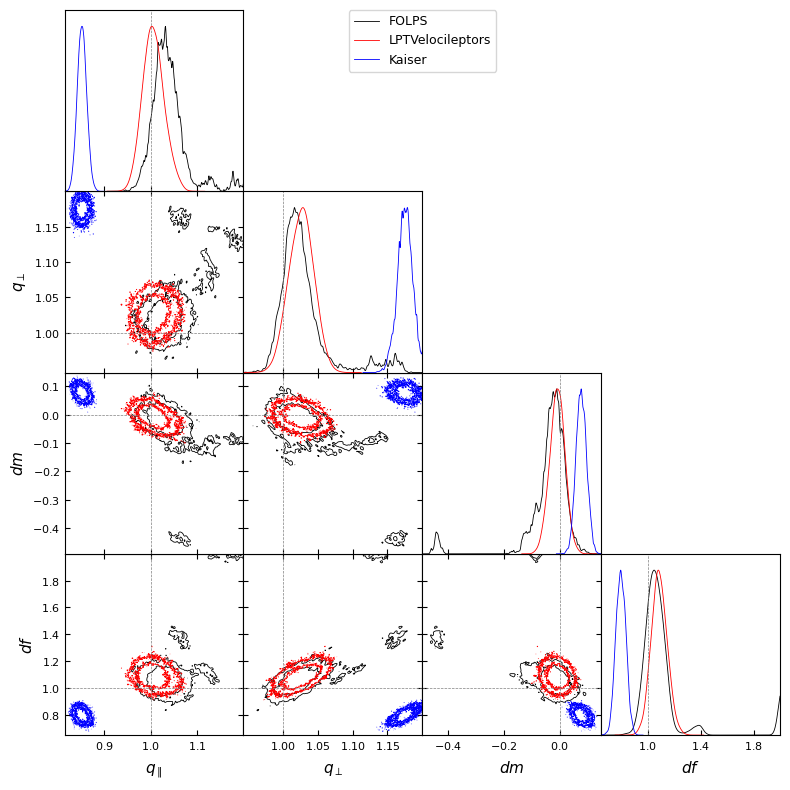

In [40]:
plotting.plot_triangle([chain,chain2,chain4],fill = True, labels = ['FOLPS','LPTVelocileptors','Kaiser'],markers = {'qpar':1,'qper':1,'dm':0,'df':1});
plt.savefig('Comparisson_FOLPS_Kaiser_LPTVelocileptors')

In [3]:
from desilike.samples import Chain
from desilike import setup_logging

setup_logging()
chain5 = Chain.load('test_QSO_z1_45_kaiser_2.npy').remove_burnin(0.3)
z = 1.45

[000000.00] [0/1] 03-16 18:19  Chain                     INFO     Loading test_QSO_z1_45_kaiser_2.npy.


In [4]:
from desilike.samples import plotting

In [5]:
%matplotlib inline

In [7]:
plotting.plot_triangle(chain5, markers = {'qpar':0.853, 'qper':1.175,'dm':0.078,'df':0.798,'b1':2.261,'sn0':0.0518});
plt.savefig('test_QSO_z1_45_v1_kaiser_2')

Removed no burn in
[000191.69] [0/1] 03-16 18:22  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0007087185082246086,N_eff=33600.0). Using fallback (h=0.016621871584257958)
[000191.75] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qpar, qper
[000191.83] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qpar, dm
[000191.89] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qpar, df
[000191.95] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qpar, b1
[000192.02] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qpar, sn0
[000192.07] [0/1] 03-16 18:22  root                      WARNING  fine_bins_2D not large enough for optimal density: qper, dm
[000192.14] [0/1] 03-16 18:22  r